In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [3]:
mnist_base_path="/Users/zhouwencheng/Desktop/Grass/data/picture/mnist"

train_data = torchvision.datasets.MNIST(
    root = mnist_base_path,
    train=True,
    transform=torchvision.transforms.ToTensor(), # (0, 1)
    download=DOWNLOAD_MNIST
)

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


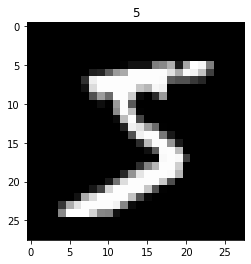

In [4]:
print(train_data.train_data.size())
print(train_data.test_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title("%i"%train_data.targets[0])
plt.show()

In [5]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
mnist_base_path="/Users/zhouwencheng/Desktop/Grass/data/picture/mnist"


test_data = torchvision.datasets.MNIST(root=mnist_base_path, train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim = 1)).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets[:2000]

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,  # 有多少个高度-多少个层 黑白只有1  彩色图片有RGB3个层
                out_channels = 16, # 输出高度
                kernel_size=5, #  
                stride=1,     # 步长
                padding = 2, # 边缘是否补0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, ),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1) # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

In [10]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [11]:
for epoch in range(EPOCH):
    for step,(x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)
#         print(output)
#         loss = loss_func(output, b_y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         if step % 100 ==0:
#             test_output, last_layer = cnn(test_x)
#             pred_y = torch.max(test_output, 1)[1].data.squeeze()
#             accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
#             print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)